# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# This might be helpful:
from collections import Counter
from datetime import datetime

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
# Median Household Income dataset
print(f'df_hh_income shape: {df_hh_income.shape}')
display(df_hh_income.sample(7))
print(f'NaN values? {df_hh_income.isna().values.any()}')
print(f'Duplicates? {df_hh_income.duplicated().values.any()}')

df_hh_income shape: (29322, 3)


Geographic Area              City Median Income
24081              SD   White Rock town             -
26484              UT    Panguitch city         40833
5569               GA   Snellville city         60347
9650               KS       Roxbury CDP             -
8106               IA        Afton city         42137
3203               CA  Silver Lakes CDP         69157
6041               ID         Ucon city         48482

NaN values? True
Duplicates? False


In [6]:
# Pct People Below Poverty Level dataset
print(f'df_pct_poverty shape: {df_pct_poverty.shape}')
display(df_pct_poverty.sample(7))
print(f'NaN values? {df_pct_poverty.isna().values.any()}')
print(f'Duplicates? {df_pct_poverty.duplicated().values.any()}')

df_pct_poverty shape: (29329, 3)


Geographic Area                  City poverty_rate
11684              MA      Williamstown CDP         10.4
26291              UT           Beaver city         11.3
24142              TN        Brentwood city          2.6
8250               IA  Center Junction city          2.2
10369              LA         Bogalusa city         36.8
9072               IA      West Branch city          8.7
25817              TX    Ranchitos East CDP         65.7

NaN values? False
Duplicates? False


In [7]:
# Pct Over 25 Completed HS dataset
print(f'df_pct_completed_hs shape: {df_pct_completed_hs.shape}')
display(df_pct_completed_hs.sample(7))
print(f'NaN values? {df_pct_completed_hs.isna().values.any()}')
print(f'Duplicates? {df_pct_completed_hs.duplicated().values.any()}')

df_pct_completed_hs shape: (29329, 3)


Geographic Area               City percent_completed_hs
28728              WI  Lake Wazeecha CDP                   99
22697              PA    Paxtonville CDP                 93.5
27654              WA    Marblemount CDP                  100
67                 AL     Brookside town                 78.7
1702               AR      Magazine city                 77.5
17338              NY     Hunter village                 95.8
29224              WY   Jeffrey City CDP                    -

NaN values? False
Duplicates? False


In [8]:
# Share of Race by City dataset
print(f'df_share_race_city shape: {df_share_race_city.shape}')
display(df_share_race_city.sample(7))
print(f'NaN values? {df_share_race_city.isna().values.any()}')
print(f'Duplicates? {df_share_race_city.duplicated().values.any()}')

df_share_race_city shape: (29268, 7)


Geographic area             City share_white share_black  \
15121              NE  Carroll village        96.5           0   
14937              MT          Roy CDP        99.1           0   
25083              TX      Guthrie CDP        98.8           0   
6845               IL  Mettawa village        89.9         1.8   
10751              LA      Vinton town        75.3        20.7   
10354              LA       Boyce town        25.6        71.7   
9358               KS     Hanston city        95.1           0   

      share_native_american share_asian share_hispanic  
15121                     0         0.4              7  
14937                   0.9           0              0  
25083                   0.6           0            8.8  
6845                      0         4.6             11  
10751                   0.6         0.4            2.7  
10354                   0.4         0.2            0.5  
9358                      0           0            9.7

NaN values? False
Duplicates? False


In [9]:
# Deaths by Police US dataset
print(f'df_fatalities shape: {df_fatalities.shape}')
display(df_fatalities.sample(7))
print(f'NaN values? {df_fatalities.isna().values.any()}')
print(f'Duplicates? {df_fatalities.duplicated().values.any()}')

df_fatalities shape: (2535, 14)


id                   name      date manner_of_death         armed  \
1787  1998  Edwin Amaya Maldonado  27/10/16            shot  undetermined   
114    153          Bruce Steward  15/02/15            shot       hatchet   
1852  2065        Mark Daniel Sly  22/11/16            shot           gun   
57     107         Darin Hutchins  24/01/15            shot         knife   
2391  2654                  TK TK  10/06/17            shot  undetermined   
2238  2491          William Baker  09/04/17            shot           gun   
1558  1748             John Casey  31/07/16            shot          rock   

       age gender race       city state  signs_of_mental_illness  \
1787 24.00      M    H   Elberton    GA                    False   
114  34.00      M    W     Colton    OR                     True   
1852 45.00      M    H  La Mirada    CA                    False   
57   26.00      M    B  Baltimore    MD                     True   
2391   NaN      M  NaN     Auburn    WA                    False   
2238 36.00      M  NaN    Ontario    CA                    False   
1558 32.00      M    W     Phelps    KY                    False   

      threat_level         flee  body_camera  
1787        attack         Foot        False  
114          other  Not fleeing        False  
1852        attack  Not fleeing        False  
57           other  Not fleeing        False  
2391  undetermined          Car        False  
2238         other  Not fleeing        False  
1558        attack         Foot        False

NaN values? True
Duplicates? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
# substituting NaN values for 0 in median income
income_nan = df_hh_income[df_hh_income.isna().values]['Median Income']
df_hh_income.loc[income_nan.index, 'Median Income'] = 0
df_hh_income[df_hh_income['Median Income'] == 0].head()

Geographic Area                  City Median Income
29119              WY            Albany CDP             0
29121              WY            Alcova CDP             0
29123              WY  Alpine Northeast CDP             0
29126              WY    Antelope Hills CDP             0
29129              WY         Arlington CDP             0

In [11]:
# NaN values showing in the race column
# I think not changing it would be better here.
display(df_fatalities[df_fatalities.isna().values])

id                name      date   manner_of_death    armed   age  \
59     110    William Campbell  25/01/15              shot      gun 59.00   
124    584   Alejandro Salazar  20/02/15              shot      gun   NaN   
241    244  John Marcell Allen  30/03/15              shot      gun 54.00   
266    534          Mark Smith  09/04/15  shot and Tasered  vehicle 54.00   
340    433          Joseph Roy  07/05/15              shot    knife 72.00   
...    ...                 ...       ...               ...      ...   ...   
2529  2819    Brian J. Skinner  28/07/17              shot    knife 32.00   
2530  2822    Rodney E. Jacobs  28/07/17              shot      gun 31.00   
2531  2813               TK TK  28/07/17              shot  vehicle   NaN   
2531  2813               TK TK  28/07/17              shot  vehicle   NaN   
2532  2818  Dennis W. Robinson  29/07/17              shot      gun 48.00   

     gender race           city state  signs_of_mental_illness threat_level  \
59        M  NaN        Winslow    NJ                    False       attack   
124       M    H        Houston    TX                    False       attack   
241       M  NaN   Boulder City    NV                    False       attack   
266       M  NaN     Kellyville    OK                    False       attack   
340       M  NaN  Lawrenceville    GA                     True        other   
...     ...  ...            ...   ...                      ...          ...   
2529      M  NaN      Glenville    NY                     True        other   
2530      M  NaN    Kansas City    MO                    False       attack   
2531      M  NaN    Albuquerque    NM                    False       attack   
2531      M  NaN    Albuquerque    NM                    False       attack   
2532      M  NaN          Melba    ID                    False       attack   

             flee  body_camera  
59    Not fleeing        False  
124           Car        False  
241   Not fleeing        False  
266         Other        False  
340   Not fleeing        False  
...           ...          ...  
2529  Not fleeing        False  
2530  Not fleeing        False  
2531          Car        False  
2531          Car        False  
2532          Car        False  

[346 rows x 14 columns]

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
# Removing areas that have a poverty rate of '-'
removal = df_pct_poverty[df_pct_poverty.poverty_rate == '-']
df_pct_poverty.drop(removal.index, inplace=True)
# Making the poverty_rate column a numeric dtype.
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

# multiple cities in a state, so poverty rate/state is going to be averaged.
poverty_rate = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate': pd.Series.mean})
poverty_rate.sort_values('poverty_rate', ascending=True, inplace=True)

print('Top3 lowest impoverished states:')
display(poverty_rate.head(3))
print('\nTop3 highest impoverished states:')
display(poverty_rate.tail(3))

Top3 lowest impoverished states:


Geographic Area  poverty_rate
31              NJ          8.19
6               CT          9.14
19              MA          9.59


Top3 highest impoverished states:


Geographic Area  poverty_rate
10              GA         23.78
3               AZ         25.67
25              MS         26.88

In [13]:
poverty_bar = px.bar(x=poverty_rate.poverty_rate,
                    y=poverty_rate['Geographic Area'],
                    orientation='h',
                    color=poverty_rate.poverty_rate,
                    color_continuous_scale='Brwnyl',
                    title='US State Average Poverty Rates')
poverty_bar.update_layout(xaxis_title='Poverty Rate(%)',
                         yaxis_title='State')
poverty_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [14]:
# removed the rows with '-' for percent_completed_hs
removal = df_pct_completed_hs[df_pct_completed_hs.percent_completed_hs == '-']
df_pct_completed_hs.drop(removal.index, inplace=True)

# change percent_completed_hs to numeric dtype
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

# grouping and sorting the average percent_completed_hs
avg_cmplt_hs = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': pd.Series.mean})
avg_cmplt_hs.sort_values('percent_completed_hs', ascending=True, inplace=True)

print('The Top3 states with the LOWEST high school completion:')
display(avg_cmplt_hs.head(3))
print('The Top3 states with the HIGHEST high school completion:')
display(avg_cmplt_hs.tail(3))

The Top3 states with the LOWEST high school completion:


Geographic Area  percent_completed_hs
43              TX                 75.69
25              MS                 78.47
10              GA                 79.01

The Top3 states with the HIGHEST high school completion:


Geographic Area  percent_completed_hs
11              HI                 91.67
50              WY                 92.10
19              MA                 92.40

In [15]:
hs_cmplt = px.bar(x=avg_cmplt_hs['Geographic Area'],
                 y=avg_cmplt_hs.percent_completed_hs,
                 title='Average High School Completion by State',
                 color=avg_cmplt_hs.percent_completed_hs,
                 color_continuous_scale='YlGnBu')
hs_cmplt.update_layout(xaxis_title='State',
                      yaxis_title='High School Completion(%)')
hs_cmplt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [16]:
merge_pov_hs = poverty_rate.merge(avg_cmplt_hs, on='Geographic Area')
merge_pov_hs.head()

Geographic Area  poverty_rate  percent_completed_hs
0              NJ          8.19                 90.85
1              CT          9.14                 91.59
2              MA          9.59                 92.40
3              WY          9.89                 92.10
4              MD         10.31                 88.42

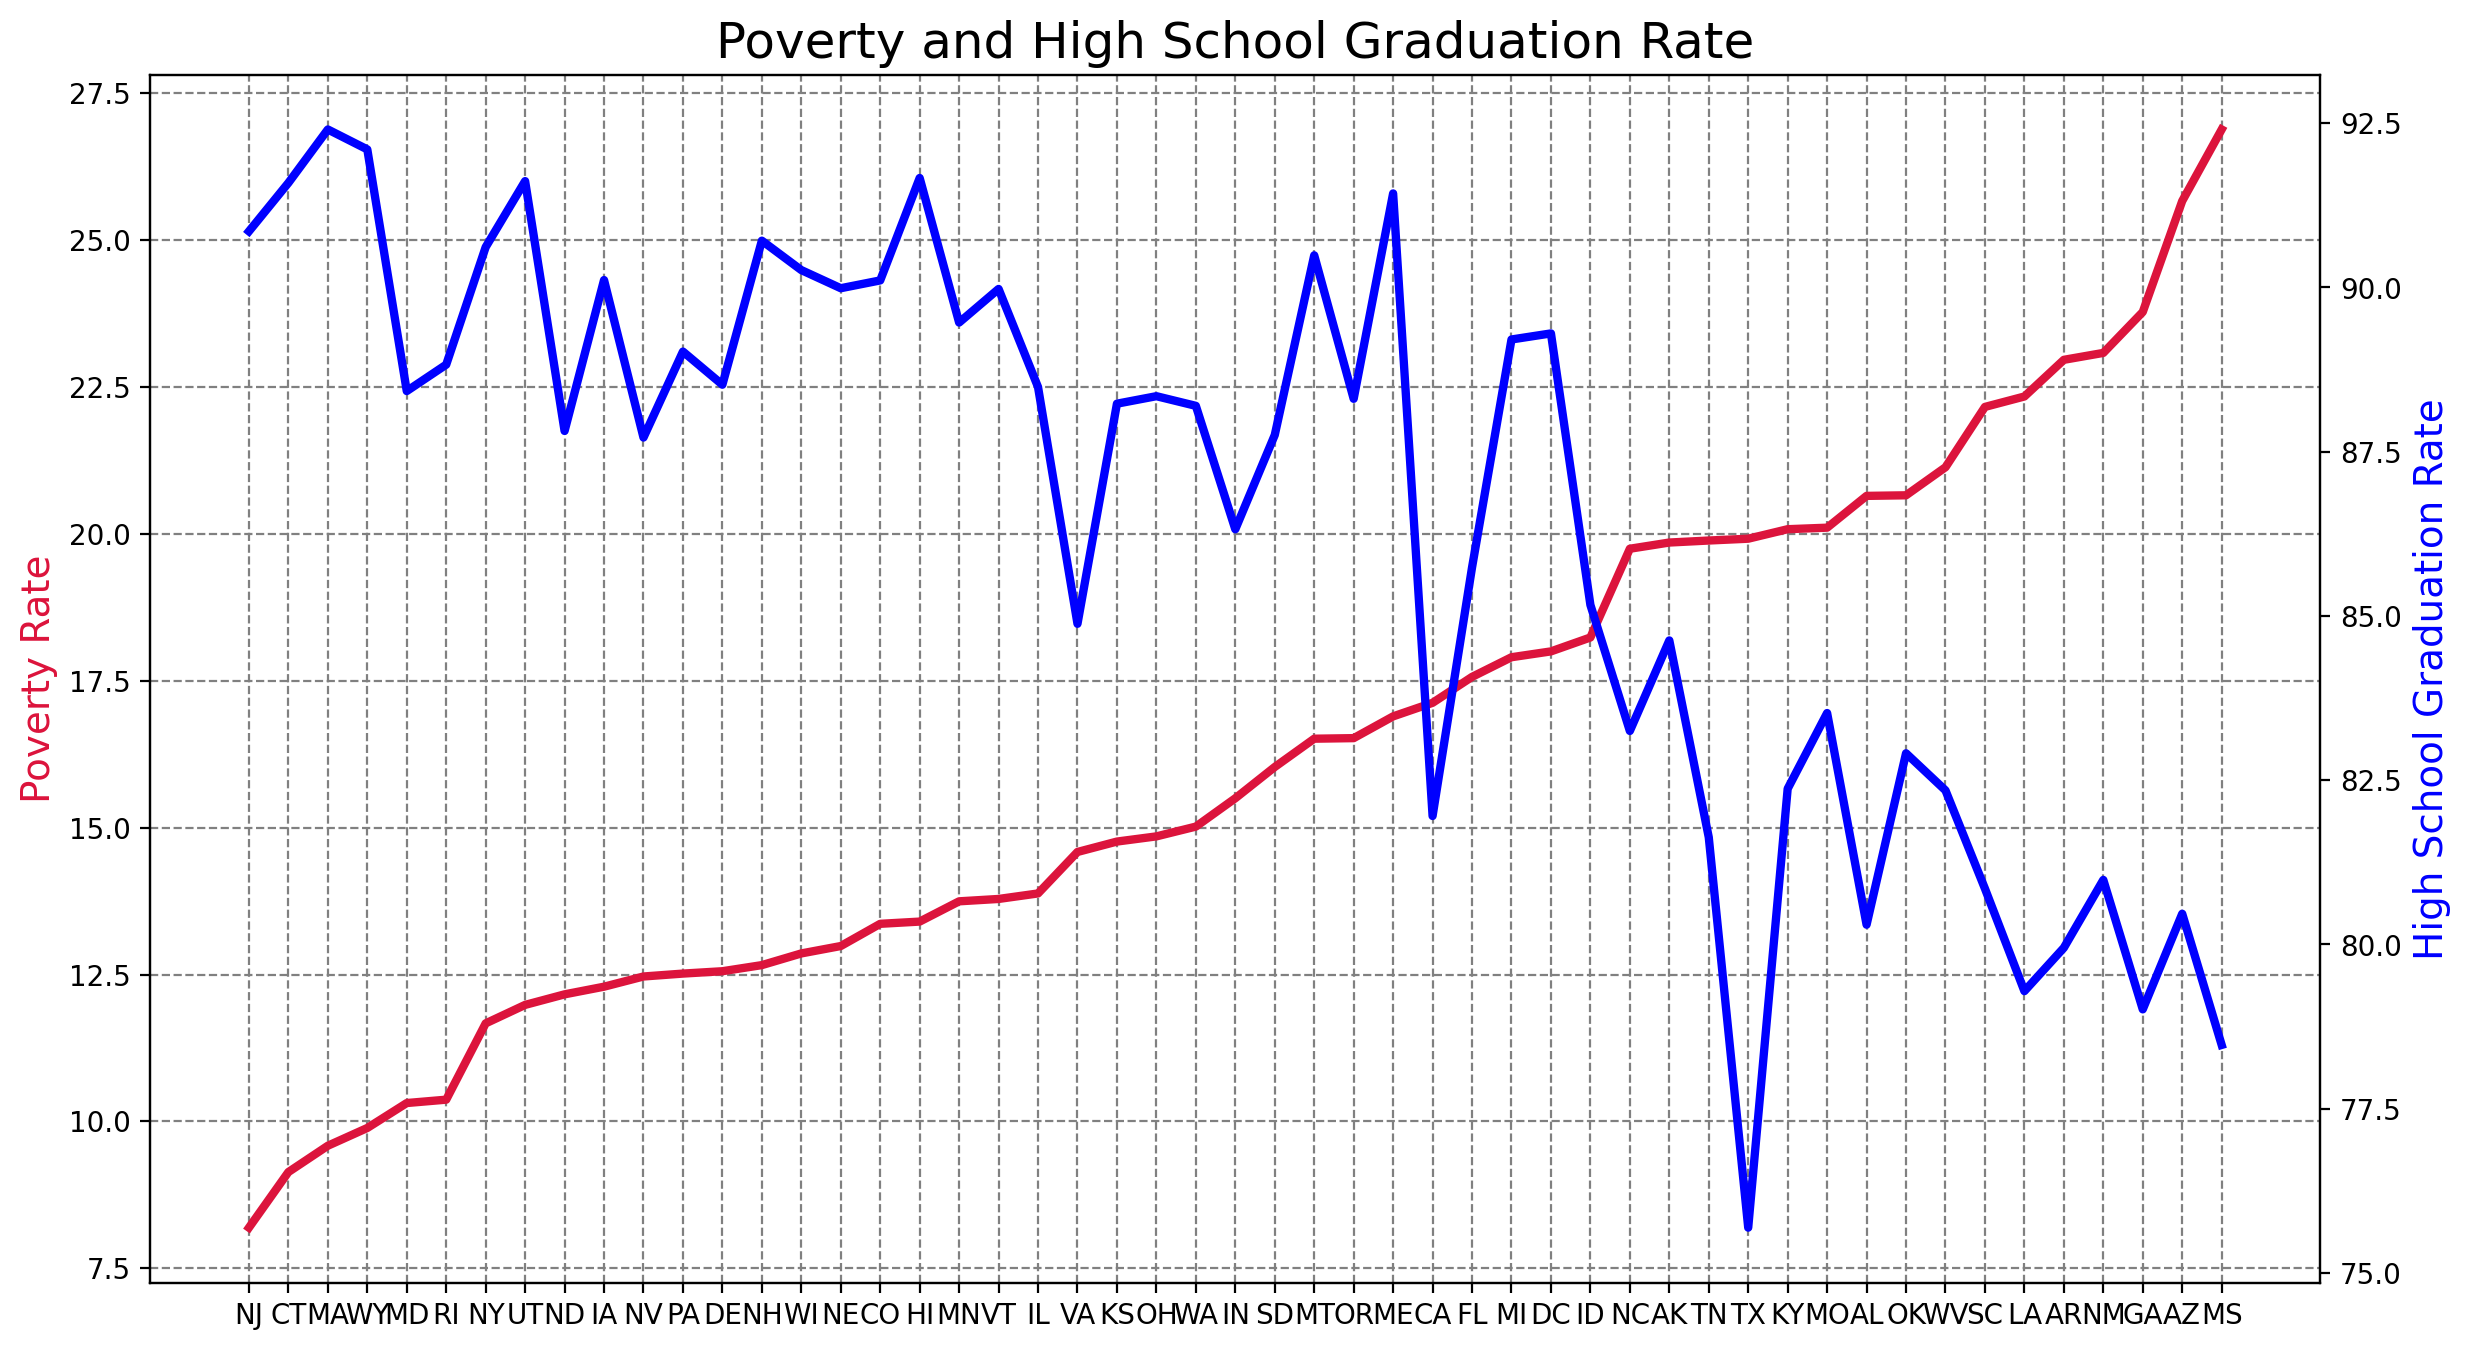

In [17]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Poverty and High School Graduation Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty Rate', fontsize=14, color='crimson')
ax2.set_ylabel('High School Graduation Rate', fontsize=14, color='blue')

ax1.grid(color='grey', linestyle='--')

ax1.plot(merge_pov_hs['Geographic Area'],
        merge_pov_hs.poverty_rate,
        color='crimson',
        linewidth=3)
ax2.plot(merge_pov_hs['Geographic Area'],
        merge_pov_hs.percent_completed_hs,
        color='blue',
        linewidth=3)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

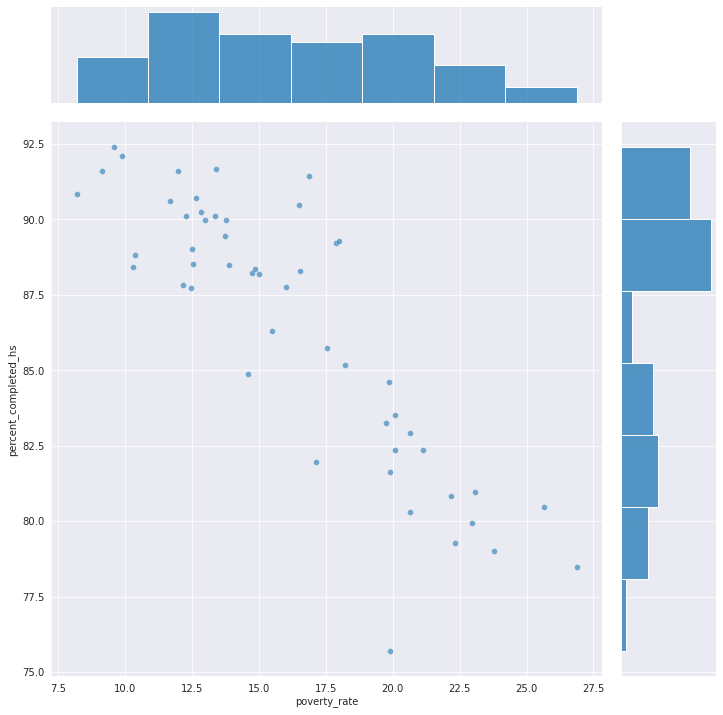

In [18]:
with sns.axes_style('darkgrid'):
    sns.jointplot(data=merge_pov_hs,
                 x='poverty_rate',
                 y='percent_completed_hs',
                 joint_kws={'alpha': 0.6},
                 height=10)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

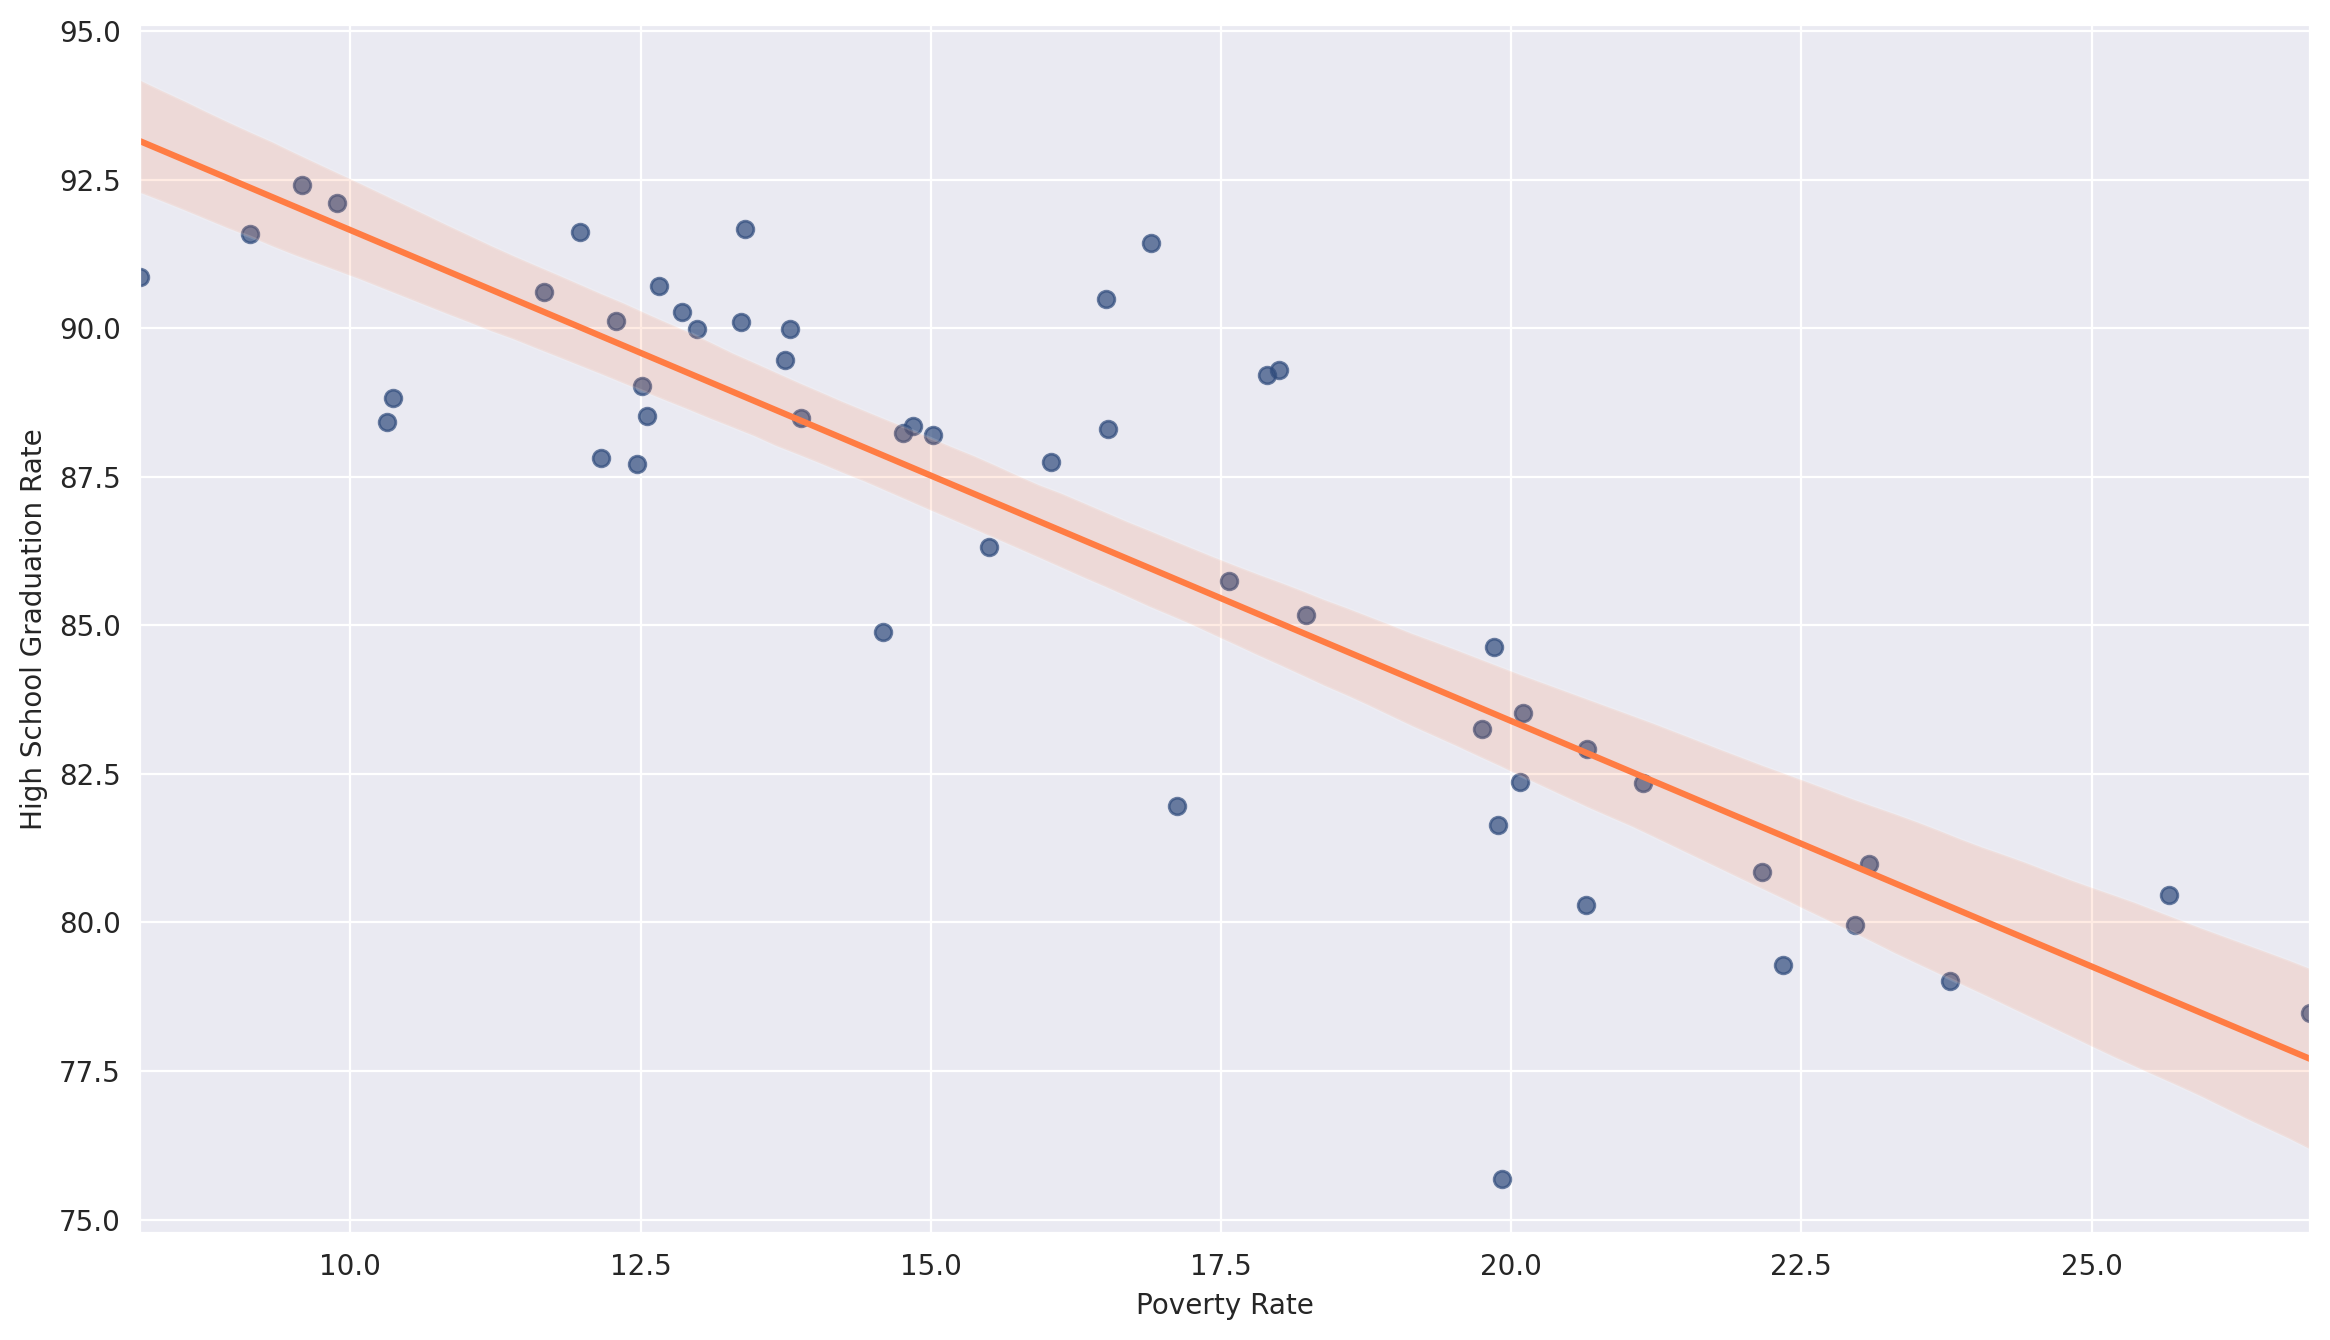

In [19]:
plt.figure(figsize=(14,8), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=merge_pov_hs,
                    x='poverty_rate',
                    y='percent_completed_hs',
                    scatter_kws={'alpha': 0.7},
                    line_kws={'color': '#ff7c43'},
                    color='#2f4b7c')
    ax.set(xlabel='Poverty Rate',
          ylabel='High School Graduation Rate')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [20]:
cols = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

# apparently there were cols with values '(X)', so they were deleted.
x_cols = df_share_race_city[df_share_race_city.values == '(X)']
df_share_race_city.drop(x_cols.index, inplace=True)

# changing values to numeric
df_share_race_city[cols] = df_share_race_city[cols].apply(pd.to_numeric, errors='coerce')

# sum values of same state > sum the total shares of each state > get percent share of each race
df_race_sum = df_share_race_city.groupby('Geographic area', as_index=False).sum()
df_race_sum['total'] = df_race_sum.sum(axis=1)
df_race_sum.share_white = df_race_sum.share_white / df_race_sum.total * 100
df_race_sum.share_black = df_race_sum.share_black / df_race_sum.total * 100
df_race_sum.share_native_american = df_race_sum.share_native_american / df_race_sum.total * 100
df_race_sum.share_asian = df_race_sum.share_asian / df_race_sum.total * 100
df_race_sum.share_hispanic = df_race_sum.share_hispanic / df_race_sum.total * 100
df_race_sum.total = df_race_sum[cols].sum(axis=1)

# creating a stack via MultiIndex
states = []
for state in df_race_sum['Geographic area']:
    count=0
    while count < 5:
        states.append(state)
        count += 1
        
share_race = []
for x in range(0, 51):
    for race in cols:
        share_race.append(race)
tuples = list(zip(*[states, share_race]))
index = pd.MultiIndex.from_tuples(tuples, names=['Geographic area', 'Share_Race'])
df = pd.DataFrame(index=index, columns=['pct'])

# creating number index instead of the MultiIndex categories
df.reset_index(inplace=True)

# Transfering data from old dataframe to new one
race_pct = df_race_sum[cols]
y=0
while y < 255:
    for x in range(0, len(race_pct)):
        for col in race_pct.columns:
                df.pct[y] = race_pct[col][x]
                y += 1

df.head()

Geographic area             Share_Race   pct
0              AK            share_white 47.74
1              AK            share_black  0.59
2              AK  share_native_american 47.97
3              AK            share_asian  1.45
4              AK         share_hispanic  2.25

In [21]:
race_share_bar = px.bar(x=df['Geographic area'],
                       y=df.pct,
                       color=df.Share_Race,
                        title='State Racial Population')
race_share_bar.update_layout(xaxis_title='State',
                             yaxis_title='Percent(%)')
race_share_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [22]:
race_death = df_fatalities.race.value_counts()
race_death

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [23]:
death_by_race_fig = px.pie(labels=race_death.index,
                          values=race_death.values,
                          title='People Killed by Race',
                          names=race_death.index,
                          hole=0.6)
death_by_race_fig.update_traces(textposition='outside', textinfo='percent+label')
death_by_race_fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [24]:
gender_death = df_fatalities.gender.value_counts()
gender_death

M    2428
F     107
Name: gender, dtype: int64

In [25]:
death_by_gender_fig = px.pie(gender_death,
                             values=gender_death.values,
                             names=gender_death.index,
                             hole=0.6,
                             title='People Killed by Gender',
                             color=gender_death.index,
                             color_discrete_map={'M':'royalblue',
                                               'F':'hotpink'})
death_by_gender_fig.update_traces(textposition='outside', textinfo='percent+label')
death_by_gender_fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [26]:
age_manner_death = df_fatalities[['name', 'manner_of_death', 'age', 'gender']]
age_manner_death.sort_values(['gender', 'manner_of_death'])

name   manner_of_death   age gender
8            Autumn Steele              shot 34.00      F
60        Jessie Hernandez              shot 17.00      F
67           Tiffany Terry              shot 39.00      F
80       Yuvette Henderson              shot 38.00      F
118           Betty Sexton              shot 43.00      F
...                    ...               ...   ...    ...
2388          Joshua Barre  shot and Tasered 29.00      M
2395         Johnny Platas  shot and Tasered 45.00      M
2403              Tommy Le  shot and Tasered 20.00      M
2418                 TK TK  shot and Tasered   NaN      M
2437  Jason Magana Herrera  shot and Tasered 35.00      M

[2535 rows x 4 columns]

In [27]:
box = px.box(age_manner_death,
             x='gender',
             y='age',
             color='manner_of_death')
box.show()

There is generally no difference in death between genders. The median age for both gender tasered or not is around 34-37 years of age -- not much of a difference. Although there are a few outliers in males getting shot being higher in age.

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [28]:
armed = df_fatalities.armed.value_counts(ascending=True)
armed_sum = armed.sum()

unarmed_pct = (armed['unarmed'] + armed['undetermined']) / armed_sum * 100
armed_pct = 100 - unarmed_pct
print(f'{armed_pct:.3}% of police killings were people armed in one way or another. The other {unarmed_pct:.3}% were unarmed or undetermined.')

88.6% of police killings were people armed in one way or another. The other 11.4% were unarmed or undetermined.


In [29]:
weapons = px.bar(x=armed.values,
                y=armed.index,
                 orientation='h',
                title='Were People Armed?')
weapons.update_layout(xaxis_title='Weapon',
                     yaxis_title='Count')
weapons.show()

In [30]:
armed_gun = armed['gun'] / armed_sum * 100
unarmed = armed['unarmed'] / armed_sum * 100

print(f'{armed_gun:.3}% of police killings the person was armed with a gun.')
print(f'{unarmed:.3}% of police killings the person was strictly unarmed')

55.3% of police killings the person was armed with a gun.
6.77% of police killings the person was strictly unarmed


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [31]:
under_25 = df_fatalities[df_fatalities.age < 25].age.count()
total = df_fatalities.age.count()
under_25_pct = under_25 / total * 100

print(f'{under_25_pct:.3}% of people were killed under 25 years old.')

18.3% of people were killed under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

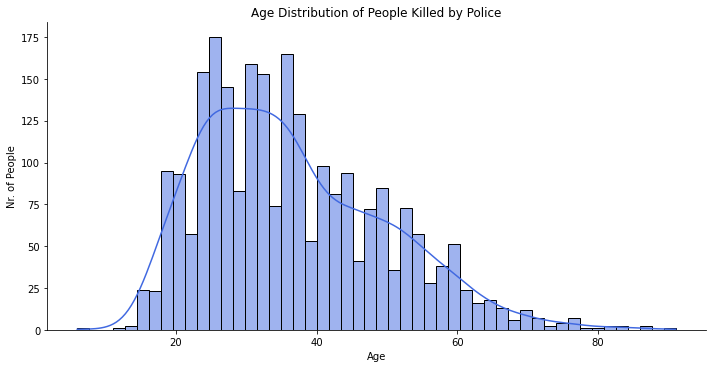

In [32]:
sns.displot(df_fatalities.age,
           aspect=2,
           kde=True,
           bins=50,
           color='royalblue')
plt.title('Age Distribution of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Nr. of People')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

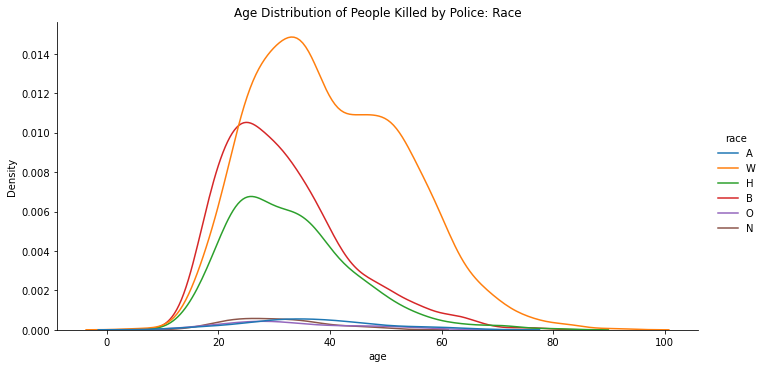

In [33]:
sns.displot(df_fatalities,
            x='age',
           aspect=2,
           kind='kde',
           hue='race')
plt.title('Age Distribution of People Killed by Police: Race')
plt.show()

The common age that people are killed by police is between their late 20s to early 30s. Looking at the race of the people killed, more often than not, they were either white, black, or hispanic. Native Americans, Asians, and other races is very uncommon.

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [34]:
race_killed = df_fatalities.race.value_counts()

race_fig = px.bar(x=race_killed.index,
                 y=race_killed.values,
                  color=race_killed.values,
                 color_continuous_scale='reds',
                 title='People Killed by Police: Race')
race_fig.update_layout(xaxis_title='Race',
                      yaxis_title='Nr. of People',
                      coloraxis_showscale=False)

race_fig.show()

Most often the person that is killed by police is a white person. They accounted for 1200 cases from January 2015 to July 2017.

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [35]:
mental_ill = df_fatalities.signs_of_mental_illness.value_counts()
mental_ill_pct = mental_ill.values[1] / (mental_ill.values[0] + mental_ill.values[1]) * 100

print(f'{mental_ill_pct:.3}% of people killed were diagnosed with a mental illness.')

25.0% of people killed were diagnosed with a mental illness.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [36]:
top10_danger_city = df_fatalities.city.value_counts()[:10]
top10_danger_city

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Miami          18
Austin         18
St. Louis      15
Name: city, dtype: int64

In [37]:
danger_city_fig = px.bar(x=top10_danger_city.index,
                        y=top10_danger_city.values,
                        title='Top 10 Cities with Most Police Killings',
                        color=top10_danger_city.values,
                        color_continuous_scale='amp')
danger_city_fig.update_layout(coloraxis_showscale=False,
                             xaxis_title='City',
                             yaxis_title='Nr. of Cases')
danger_city_fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [38]:
# Creating dataframe with just the top 10 cities
top10_cities = list(top10_danger_city.index)
cities = df_fatalities.loc[(df_fatalities.city == top10_cities[0]) |
                           (df_fatalities.city == top10_cities[1]) |
                           (df_fatalities.city == top10_cities[2]) |
                           (df_fatalities.city == top10_cities[3]) |
                           (df_fatalities.city == top10_cities[4]) |
                           (df_fatalities.city == top10_cities[5]) |
                           (df_fatalities.city == top10_cities[6]) |
                           (df_fatalities.city == top10_cities[7]) |
                           (df_fatalities.city == top10_cities[8]) |
                           (df_fatalities.city == top10_cities[9])
                          ]

city_race = cities.groupby(['city', 'race'], as_index=False).agg({'name': pd.Series.count})
city_race.head()

city race  name
0   Austin    B     3
1   Austin    H     2
2   Austin    W    13
3  Chicago    B    21
4  Chicago    H     1

In [39]:
city_race_fig = px.bar(x=city_race.city,
                      y=city_race.name,
                      color=city_race.race,
                      title='Race Share in Top 10 Danger Cities')
city_race_fig.update_layout(xaxis_title='City',
                           yaxis_title='Nr. of Cases')
city_race_fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [40]:
state_count = df_fatalities.groupby('state', as_index=False).agg({'name': pd.Series.count})
state_count.rename(columns={'name': 'cases'}, inplace=True)
state_count.head()

state  cases
0    AK     15
1    AL     50
2    AR     26
3    AZ    118
4    CA    424

In [41]:
fig = px.choropleth(state_count,
                    locations='state',
                    locationmode="USA-states",
                    color='cases',
                    scope="usa",
                   color_continuous_scale='Agsunset')
fig.show()

These states (CA, FL, TX) are not the target of severe poverty. Their poverty rate is near the middle of the pack compared to the others states. Texas is poorer of the three of has a lower level of high school graduations but still presents around half of the shootings in CA.

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [71]:
# removing the day to count just months and years.
df_fatalities.date = pd.to_datetime(df_fatalities.date)
df_fatalities.date = df_fatalities.date.dt.strftime('%Y-%m')
df_fatalities.date = pd.to_datetime(df_fatalities.date)

# counting occurences per month
cases_time = df_fatalities.groupby('date', as_index=False).agg({'name': pd.Series.count})
cases_time.rename(columns={'name': 'cases'}, inplace=True)
cases_time.head()

date  cases
0 2015-01-01     70
1 2015-02-01     78
2 2015-03-01     87
3 2015-04-01     88
4 2015-05-01     85

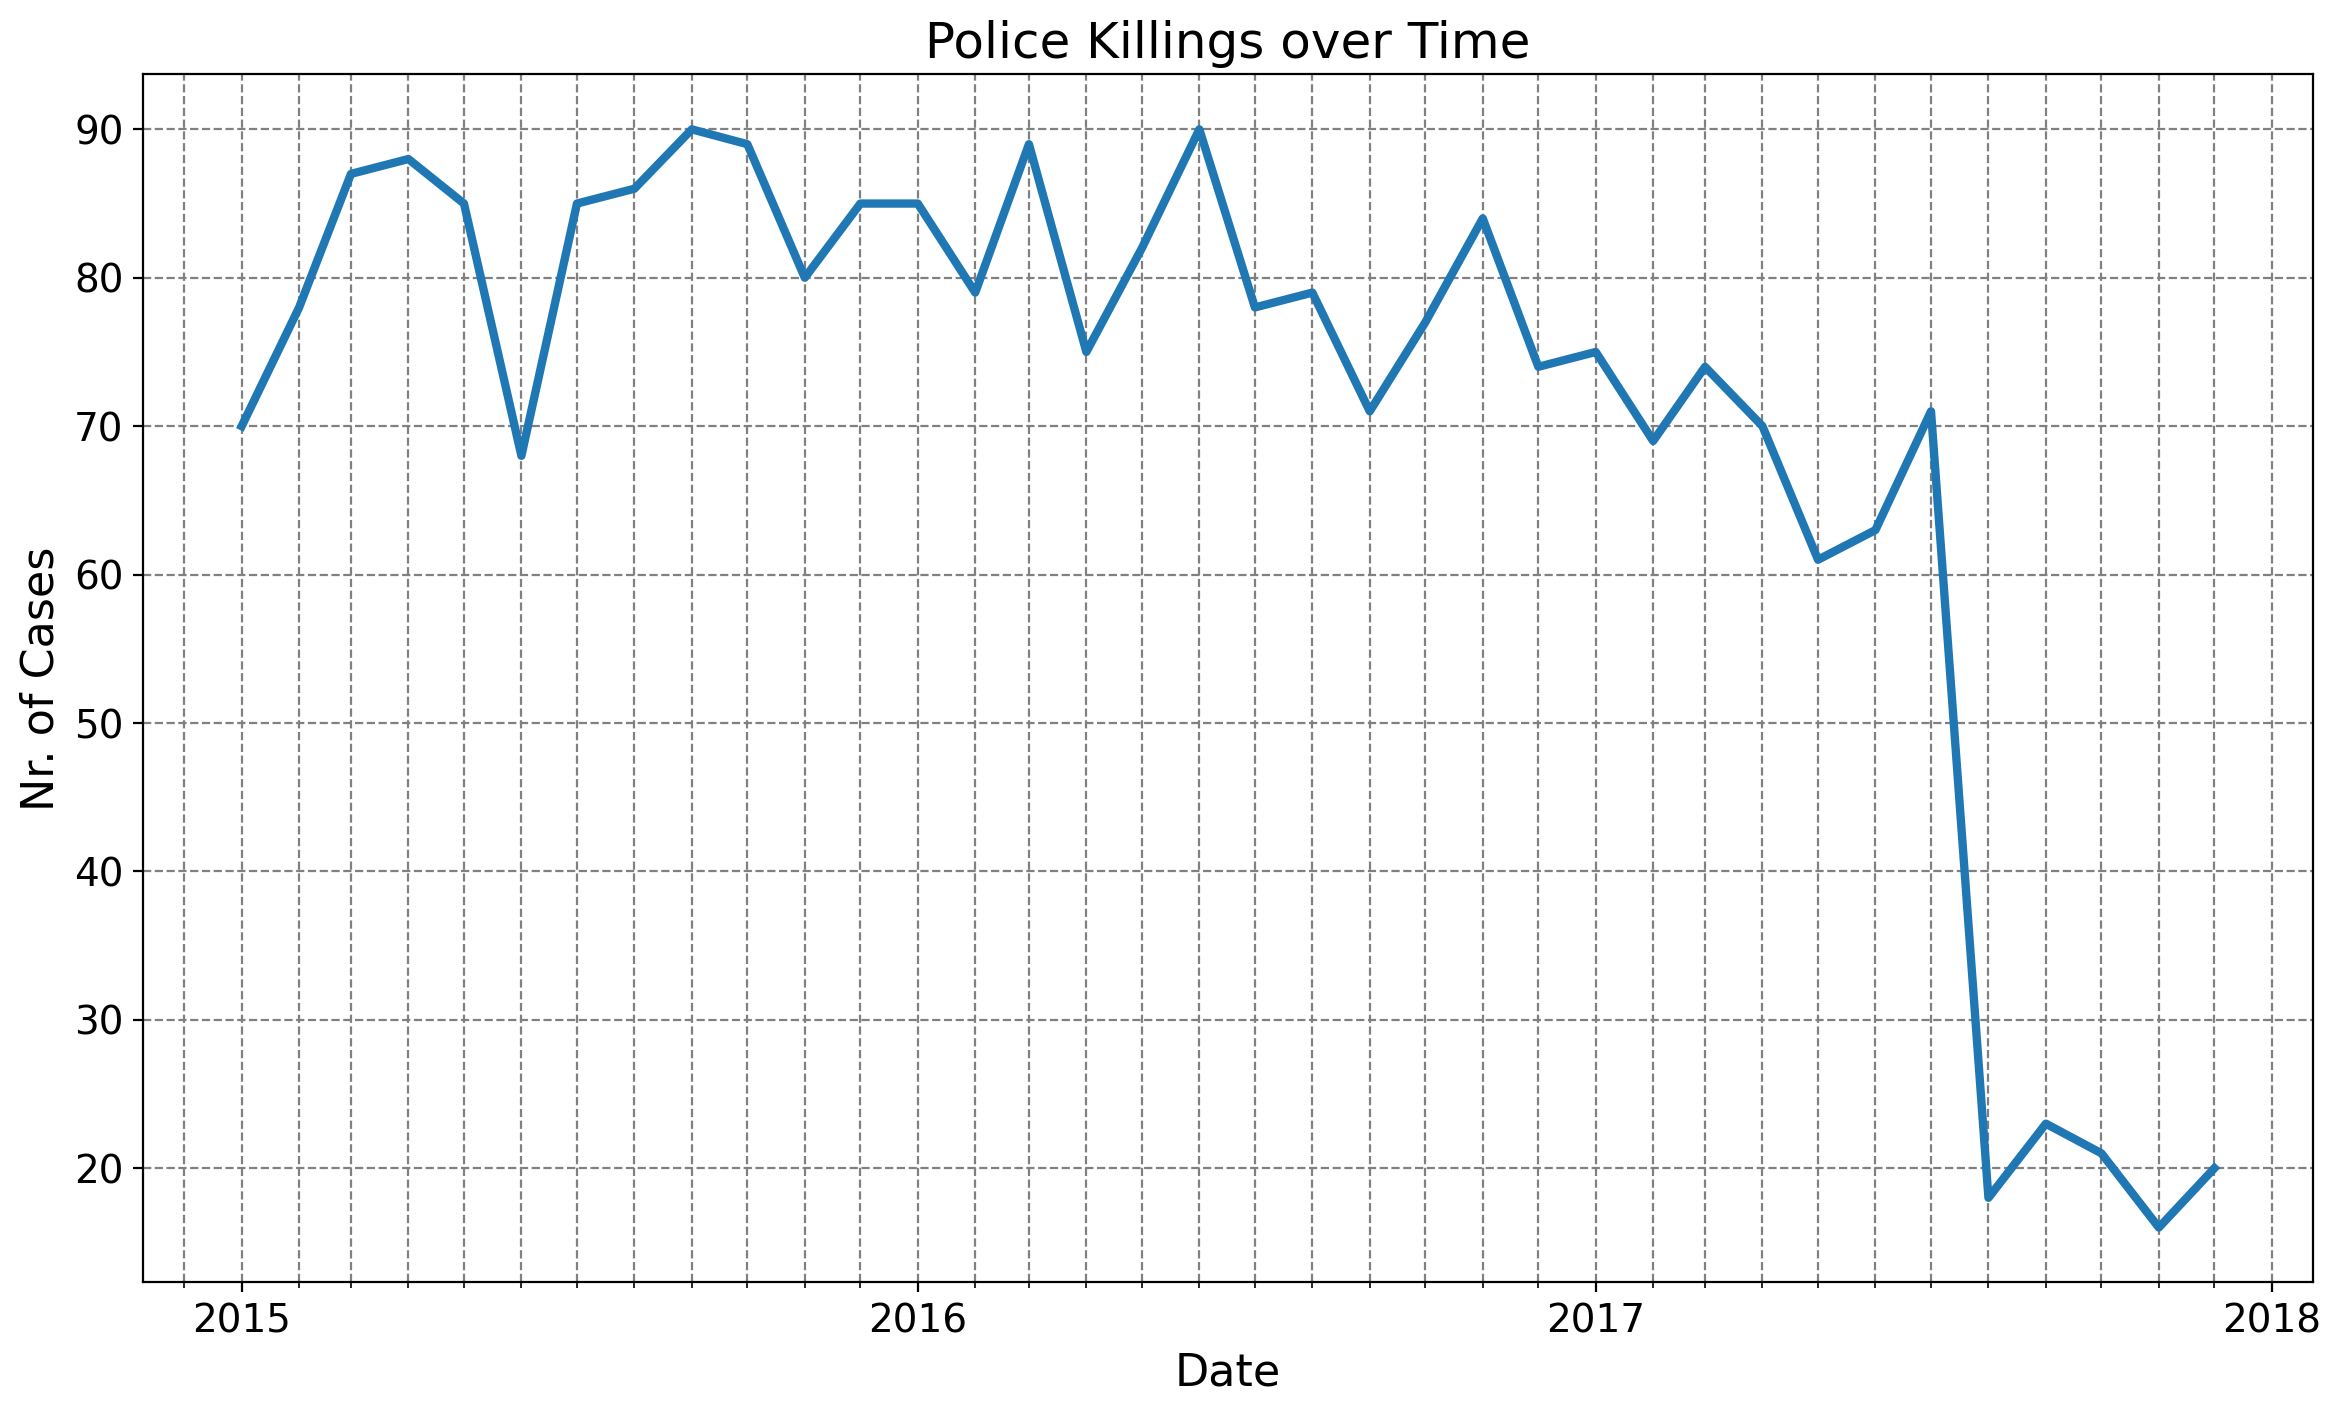

In [69]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Police Killings over Time', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Nr. of Cases', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax1 = plt.gca()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', which='both', linestyle='--')

ax1.plot(cases_time.date,
        cases_time.cases,
        linewidth=3)
plt.show()

There was a slight decline going from 2015 into 2017. The amount of killings significantly dropped August of 2017 going forth.

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).